# Exploratory Data Analysis (EDA)

In this notebook, we will perform comprehensive EDA on the Forest Cover Type dataset to understand the data distribution, relationships, and justify our model choices (Logistic Regression, SVM, Neural Network). We will also perform preprocessing and prepare the data for training.


In [ ]:
import kagglehub
import os
import shutil

# Download latest version
print("Downloading dataset...")
path = kagglehub.dataset_download("uciml/forest-cover-type-dataset")

print("Path to dataset files:", path)

# Move the downloaded file to the current directory for easier access
# We will look for csv files in the downloaded path
target_dir = os.getcwd()
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith(".csv"):
            source_file = os.path.join(root, file)
            target_file = os.path.join(target_dir, file)
            print(f"Moving {source_file} to {target_file}")
            shutil.copy(source_file, target_file)
            
print("Download and setup complete.")


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Set random seed for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

## 1. Load Data

In [16]:
data_path = 'covtype.csv'
df = pd.read_csv(data_path)
print(f"Dataset shape: {df.shape}")

Dataset shape: (581012, 55)


In [17]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


## 2. Basic Data Inspection

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [19]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


## 3. Check for Missing Values

In [20]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0])

if missing_values.sum() == 0:
    print("\nNo missing values found in the dataset.")

Missing values per column:
Series([], dtype: int64)

No missing values found in the dataset.


## 4. Comprehensive EDA & Model Justification

### Target Variable Distribution (Class Imbalance)

**Justification**: Identifying class imbalance is crucial. If substantial imbalance exists, models like Logistic Regression and SVM might be biased towards the majority class. This justifies the potential use of `class_weight='balanced'` or resampling techniques.


/var/folders/gd/0xzby1j17798xt2sq1n7l7vc0000gn/T/ipykernel_80528/373502131.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Cover_Type', palette='viridis')


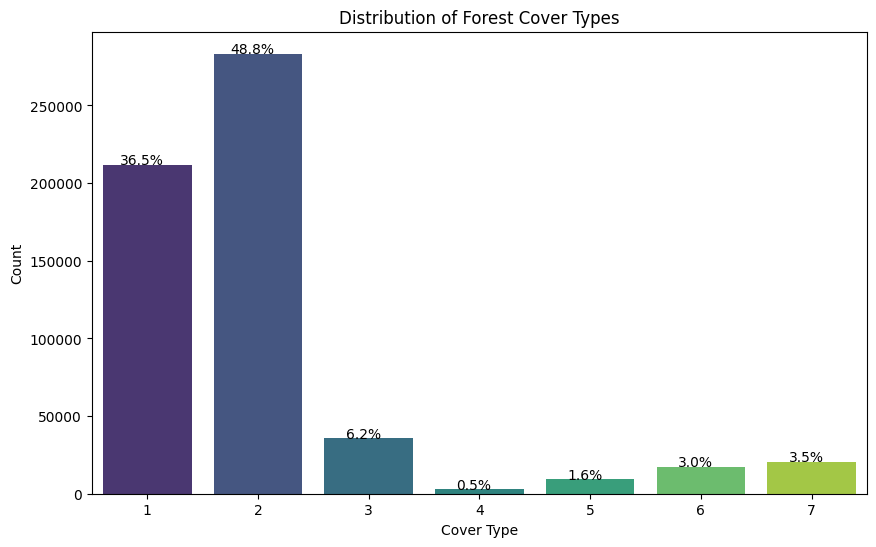

Class Counts:
Cover_Type
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64


In [21]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Cover_Type', palette='viridis')
plt.title('Distribution of Forest Cover Types')
plt.ylabel('Count')
plt.xlabel('Cover Type')

# Calculate class percentages
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), ha='center')

plt.show()

print("Class Counts:")
print(df['Cover_Type'].value_counts())

### Numerical Feature Distributions (Scaling Justification)

**Justification**: We observe the distributions of features like `Elevation`, `Aspect`, and `Slope`.
-   **Scale**: Note the difference in magnitude between `Elevation` (thousands) and `Slope` (tens). This drastic difference justifies the need for **StandardScaler**, especially for SVM (distance-based) and Neural Networks (gradient descent).
-   **Normality**: Skewed distributions might suggest log-scaling, but standard scaling is generally robust enough for these models.


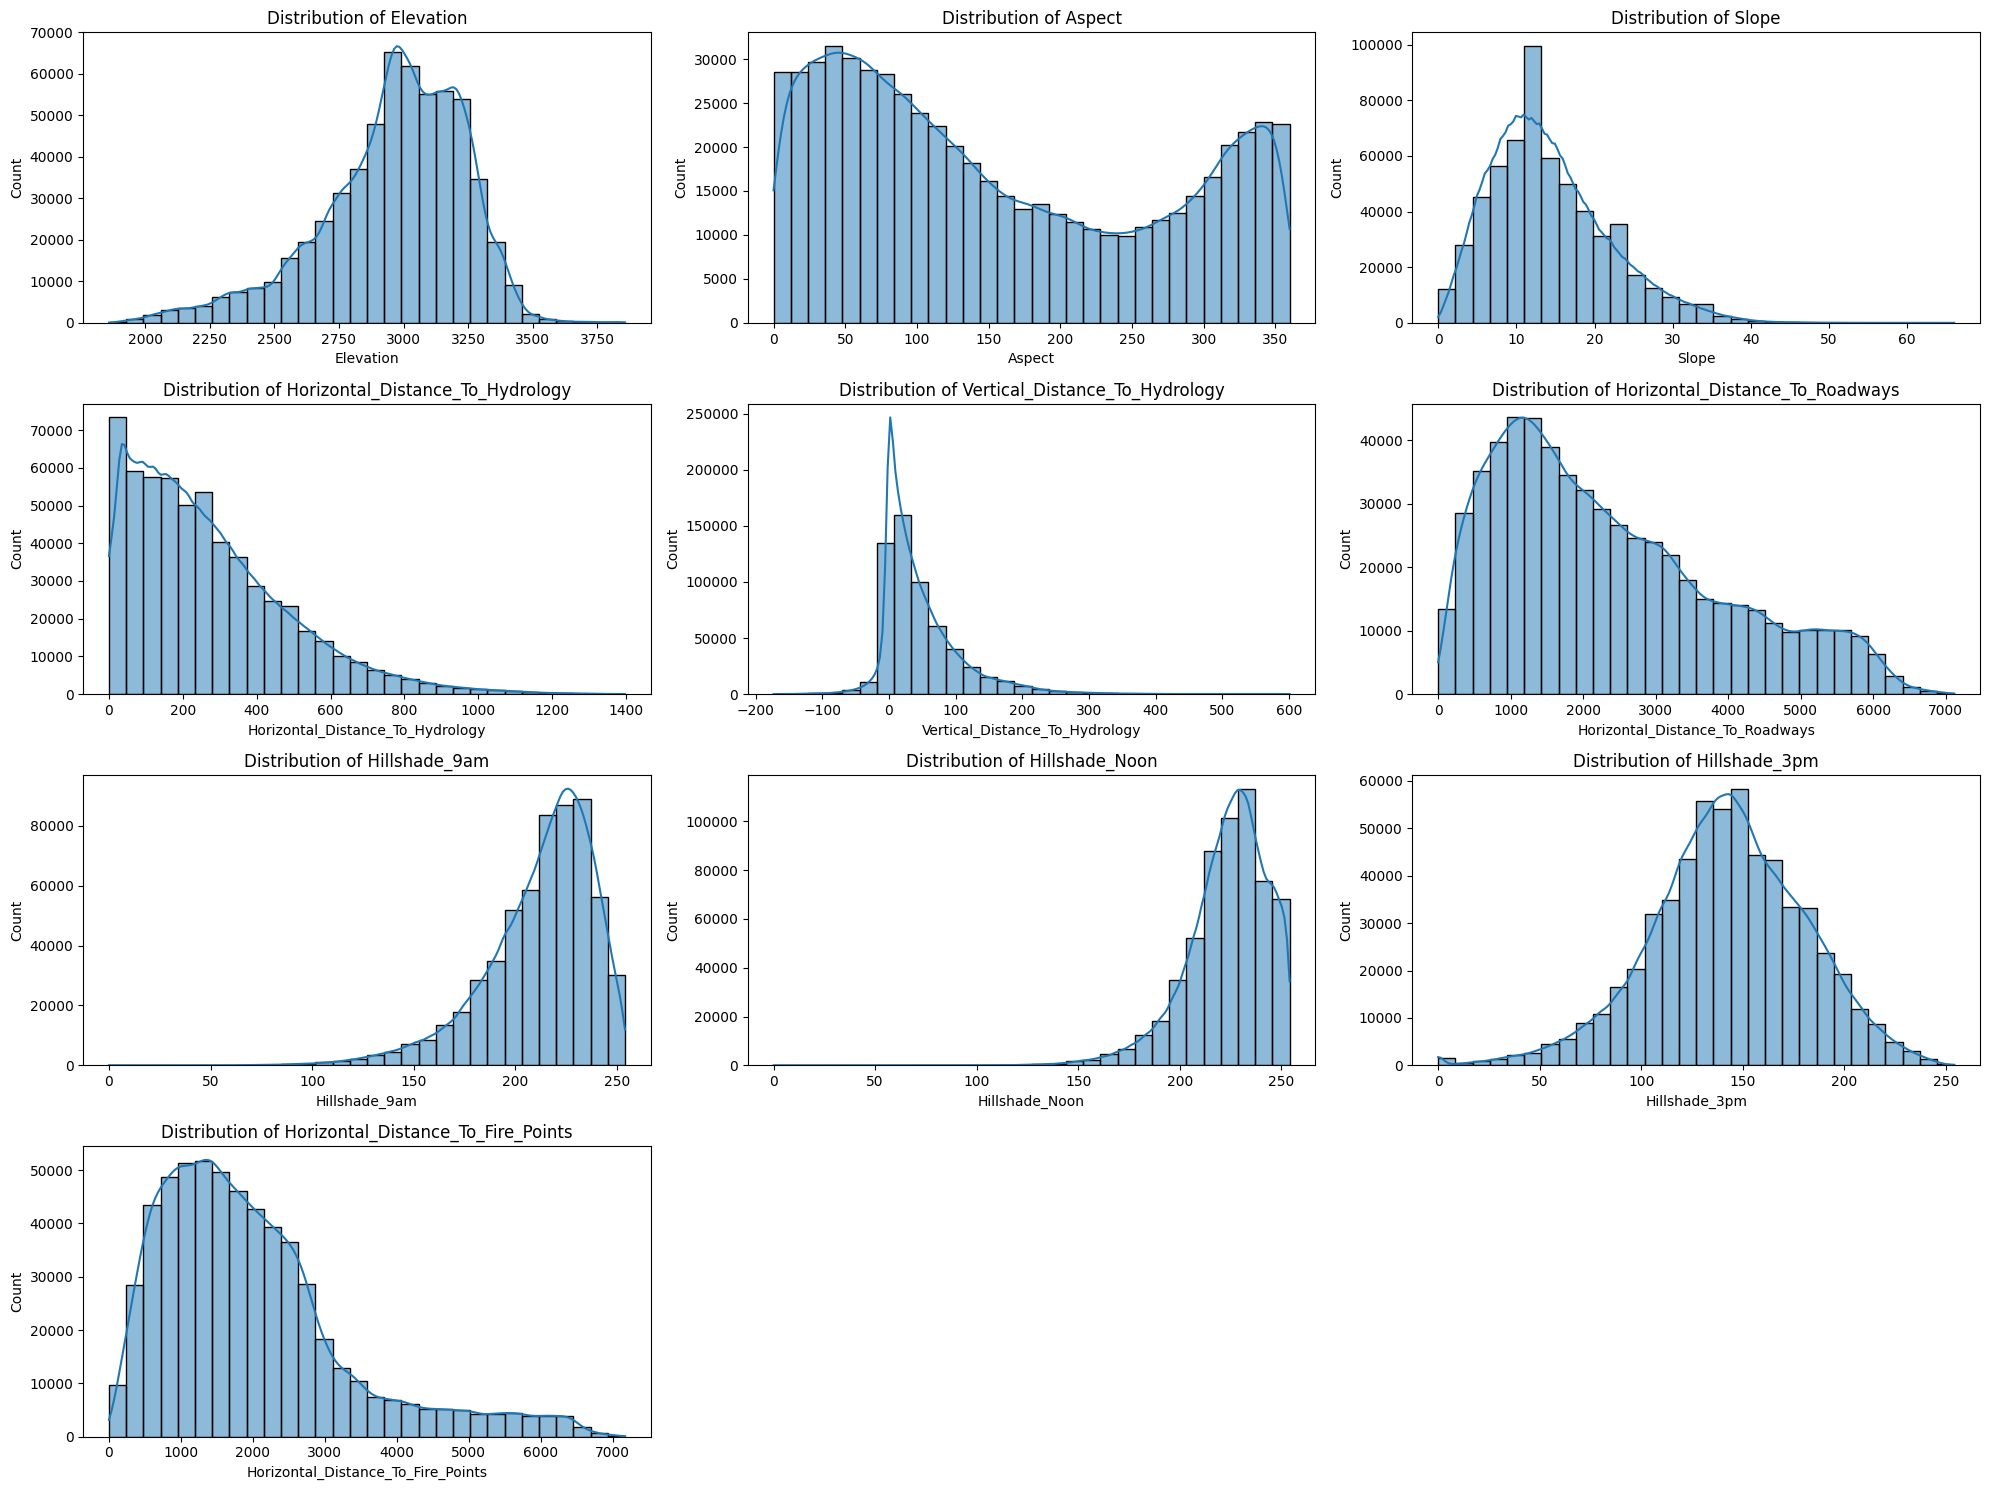

In [22]:
# continuous columns (excluding binary ones like Soil_Type and Wilderness_Area)
# The first 10 columns are continuous in this dataset
continuous_cols = df.columns[:10]

plt.figure(figsize=(20, 15))
for i, col in enumerate(continuous_cols):
    plt.subplot(4, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

### Correlation Analysis (Regularization Justification)

**Justification**: We need to check for multicollinearity among features.
-   High correlation (e.g., typically > 0.8 or 0.9) suggests features contain redundant information.
-   In **Logistic Regression**, multicollinearity can make coefficient estimates unstable. This justifies the use of **L2 Regularization (Ridge)** or **L1 (Lasso)** to handle redundancy.


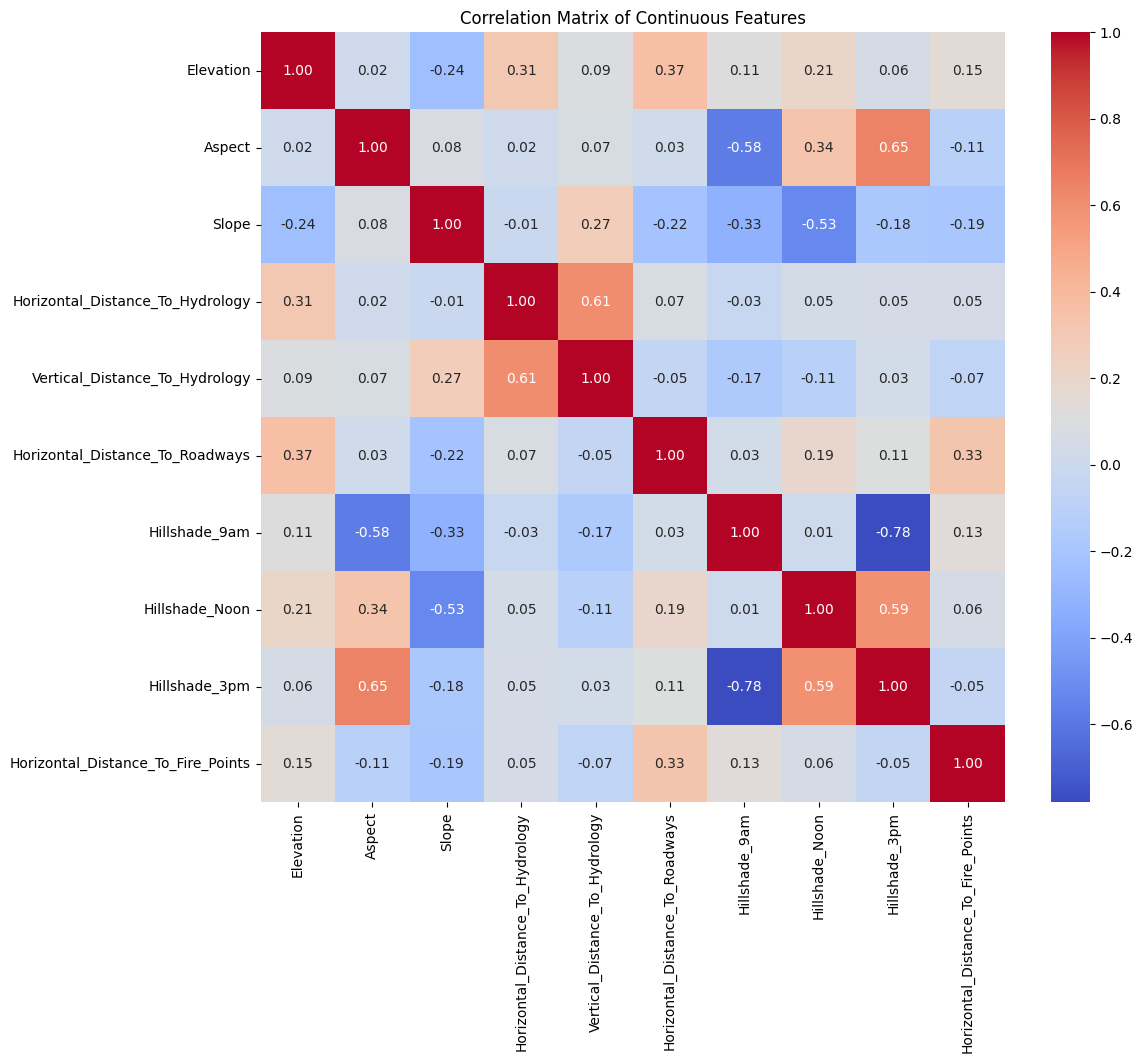

In [23]:
plt.figure(figsize=(12, 10))
# Focusing on continuous features for readability
sns.heatmap(df[continuous_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Continuous Features')
plt.show()

### Feature Distributions by Class (Non-linearity Justification)

**Justification**: Boxplots help us see if a single feature can separate the classes linearly.
-   If distributions heavily overlap for all classes across features, a simple linear boundary (Linear SVM, Logistic Regression) may underperform.
-   This overlap justifies the use of **Non-linear Models** like **SVM with RBF Kernel** or **Deep Neural Networks** which can learn complex, non-linear boundaries.


/var/folders/gd/0xzby1j17798xt2sq1n7l7vc0000gn/T/ipykernel_80528/2834317772.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cover_Type', y=col, palette='viridis')
/var/folders/gd/0xzby1j17798xt2sq1n7l7vc0000gn/T/ipykernel_80528/2834317772.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cover_Type', y=col, palette='viridis')
/var/folders/gd/0xzby1j17798xt2sq1n7l7vc0000gn/T/ipykernel_80528/2834317772.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cover_Type', y=col, palette='viridis')
/var/folde

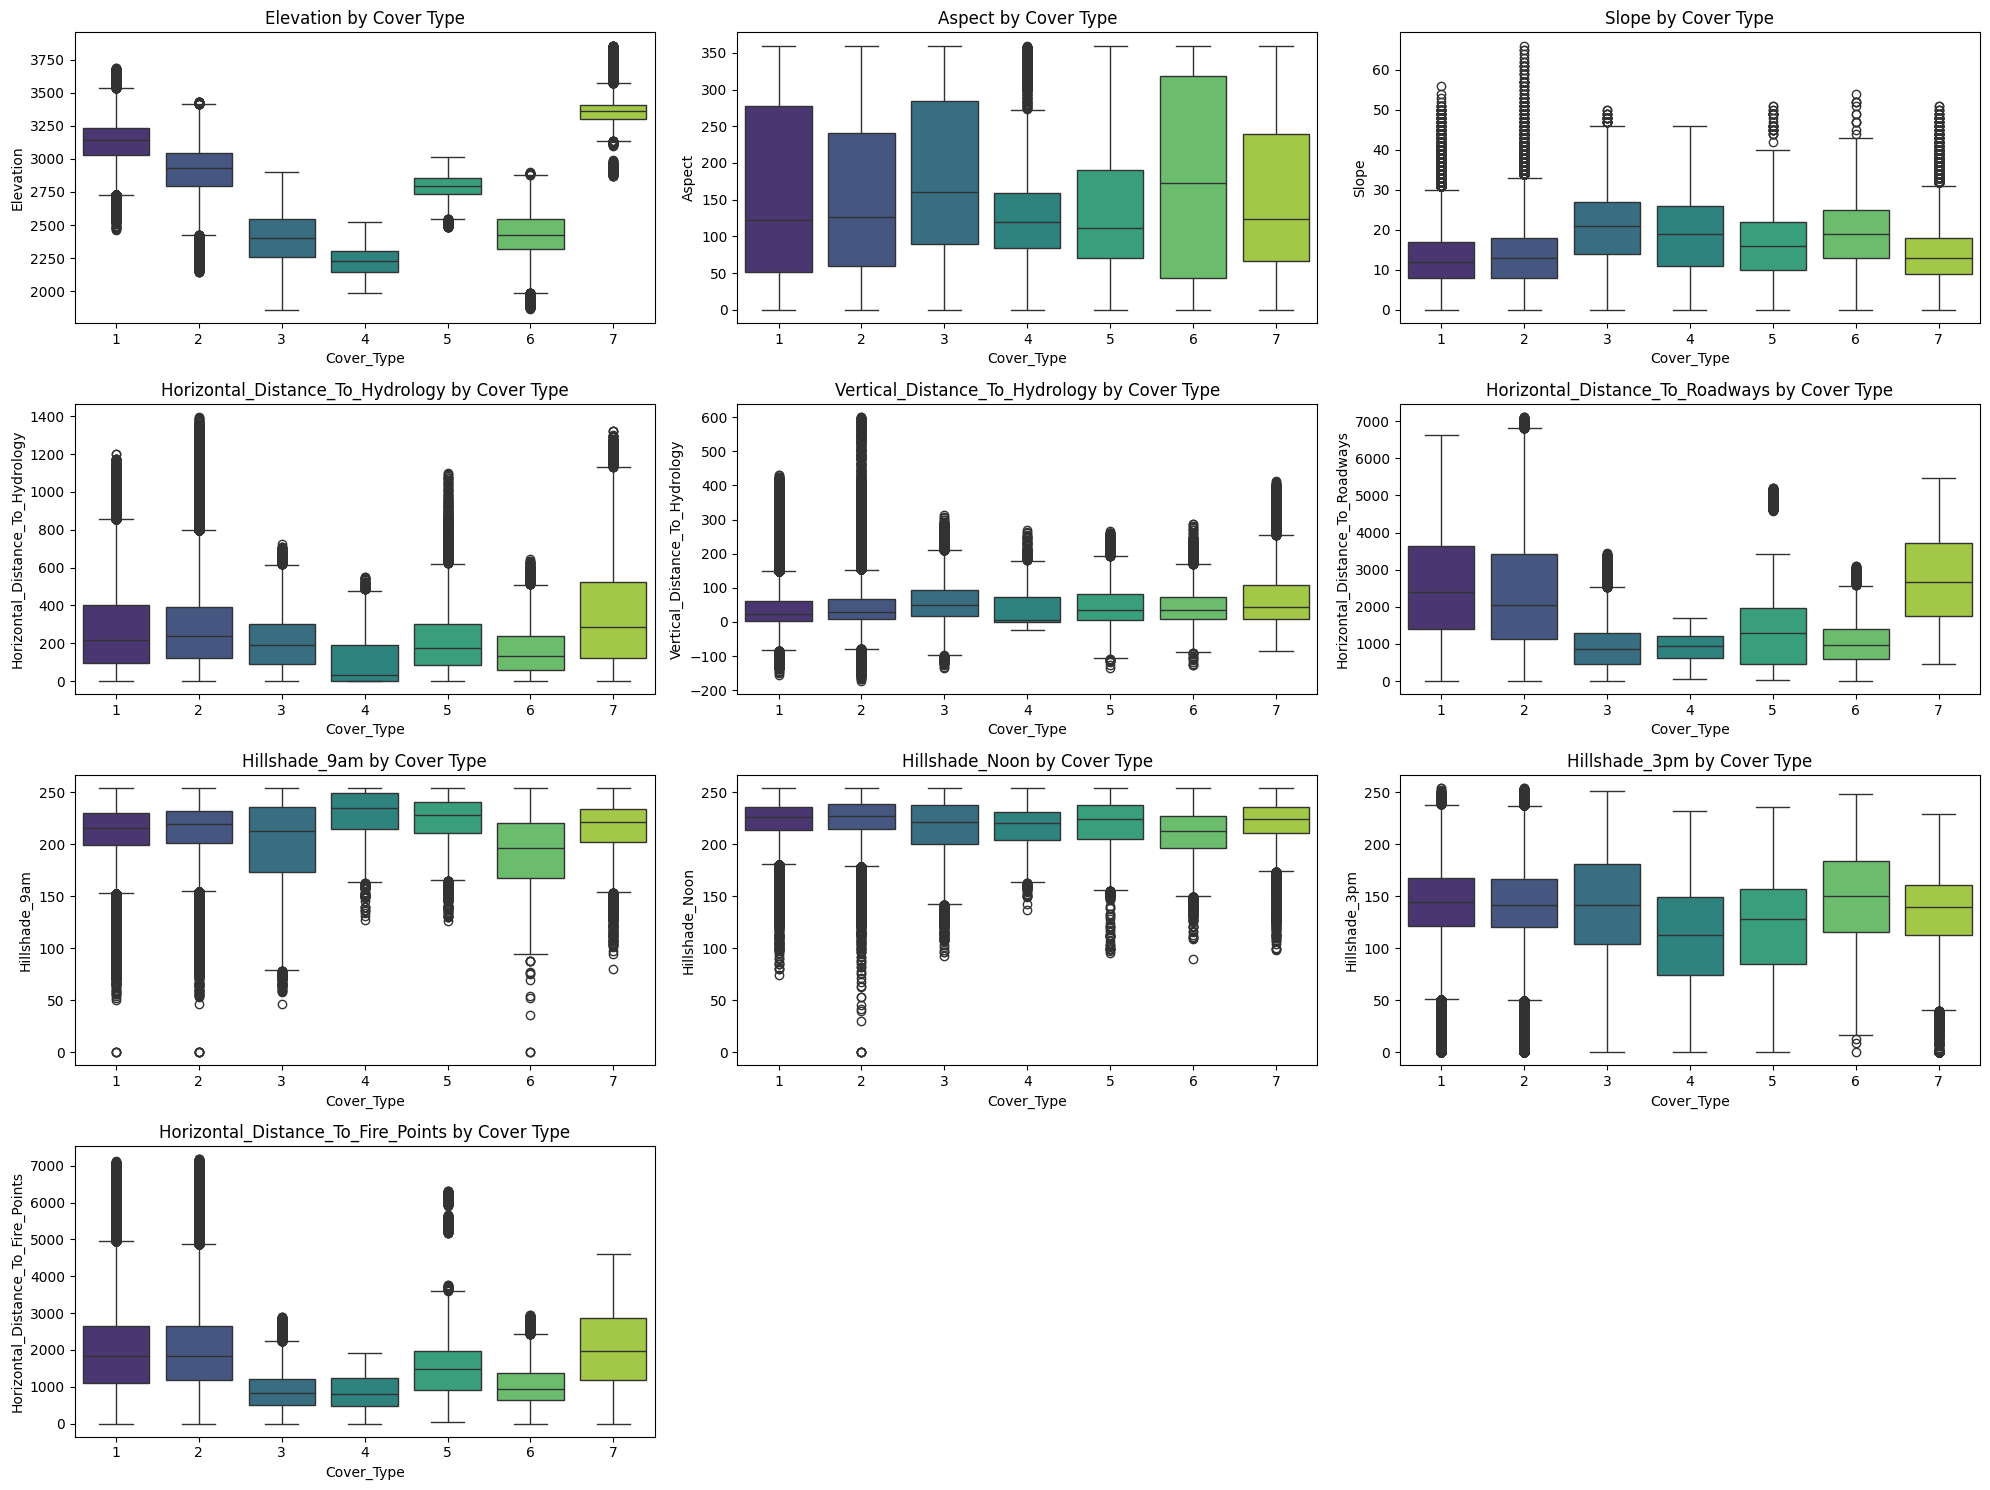

In [24]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(continuous_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df, x='Cover_Type', y=col, palette='viridis')
    plt.title(f'{col} by Cover Type')
plt.tight_layout()
plt.show()

### Dimensionality Reduction (PCA) - Complexity Justification

**Justification**: We project the data into 2D using Principal Component Analysis (PCA) to visualize the separability of classes.
-   If the 2D plot shows significant overlap and no clear clusters, the problem is not linearly separable in low dimensions.
-   **Insight**: Heavy mix of colors (classes) justifies the need for high-capacity models like **Neural Networks** that can create features in higher dimensions to find a separating hyperplane.


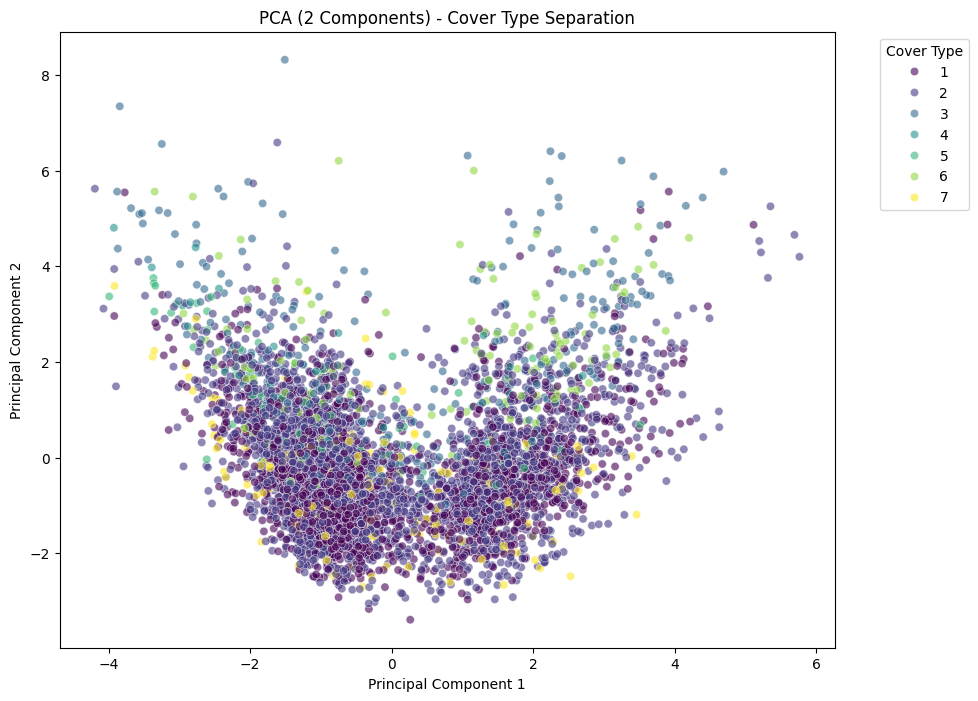

In [25]:
# We take a sample because 500k points is too many for scatter plot visualization and might appear as a blob
sample_df = df.sample(n=5000, random_state=RANDOM_SEED)
X_sample = sample_df[continuous_cols] # Using only continuous for visualization clarity
y_sample = sample_df['Cover_Type']

# Standardize for PCA
X_sample_scaled = StandardScaler().fit_transform(X_sample)

pca = PCA(n_components=2)
components = pca.fit_transform(X_sample_scaled)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=components[:,0], y=components[:,1], hue=y_sample, palette='viridis', alpha=0.6)
plt.title('PCA (2 Components) - Cover Type Separation')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cover Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## 5. Preprocessing

In [26]:
# Separate features and target
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

# Scaling
# As justified in EDA, we apply StandardScaler
scaler = StandardScaler()
# Note: We fit on the full X here for simplicity in this EDA notebook before splitting.
# In a strict pipeline, you split FIRST, then fit scaler on TRAIN, and transform TEST.
# We will do the split next, but let's define the scaled dataframe for saving.
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("Data scaled.")

Data scaled.


## 6. Train-Validation-Test Split

In [27]:
# Stratified Split
# First, split into Train+Val (80%) and Test (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=RANDOM_SEED, stratify=y)

# Second, split Train+Val into Train (75% of 80% = 60%) and Val (25% of 80% = 20%)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=RANDOM_SEED, stratify=y_train_val)

print(f"Training set shape: {X_train.shape} ({len(X_train)/len(df):.1%})")
print(f"Validation set shape: {X_val.shape} ({len(X_val)/len(df):.1%})")
print(f"Testing set shape: {X_test.shape} ({len(X_test)/len(df):.1%})")

Training set shape: (348606, 54) (60.0%)
Validation set shape: (116203, 54) (20.0%)
Testing set shape: (116203, 54) (20.0%)


## 7. Save Processed Data
Saving the processed datasets to reusable CSV files for other notebooks.


In [28]:
X_train.to_csv('X_train.csv', index=False)
X_val.to_csv('X_val.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_val.to_csv('y_val.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

print("Processed data saved to CSV files.")

Processed data saved to CSV files.
